In [1]:
import IGIMF
import numpy as np
import pandas as pd
from scipy import optimize
import scipy.integrate as integr

In [2]:
mass_metals: float = 1e7 # [Msun]
mass_gas: float = 1e9 # [Msun]
M_pgal: float = 1e10 # [Msun]
downsizing_time: float = 10 # [yr] 
t: float = 1 # [Gyr]

In [3]:
igimf = IGIMF.IGIMF(mass_metals, mass_gas, M_pgal, downsizing_time, t)

In [4]:
resolution = int(1e7)
M_ecl_v = np.logspace(np.log10(igimf.M_ecl_min), np.log10(igimf.M_ecl_max), num=resolution)
m_v = np.logspace(np.log10(igimf.m_star_min), np.log10(igimf.m_star_max), num=resolution)
Mtot = igimf.SFR * igimf.delta_t

In [5]:
k_ecl, M_max = igimf.normalization(igimf.embedded_cluster_mass_function, igimf.SFR * igimf.delta_t, igimf.M_ecl_min, igimf.M_ecl_max)

/Users/thecosmicweb/Documents/GitHub/IGIMF/_scratch/IGIMF.py:89: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  k = lambda x: np.reciprocal(integr.quad(IMF, x, upper_lim,
/Users/thecosmicweb/Documents/GitHub/IGIMF/_scratch/IGIMF.py:89: RuntimeWarning: divide by zero encountered in reciprocal
  k = lambda x: np.reciprocal(integr.quad(IMF, x, upper_lim,


In [6]:
ECMF_func = lambda M_ecl: k_ecl * igimf.embedded_cluster_mass_function(M_ecl, M_max=M_max)
def ECMF_weighted_func(M):
    return np.multiply(M, ECMF_func(M))

In [7]:
ECMF_v = np.array([ECMF_weighted_func(M) for M in M_ecl_v])

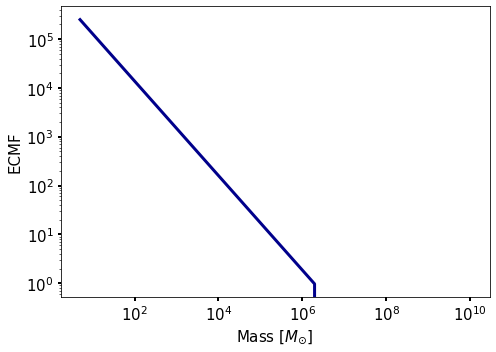

In [8]:
def IMF_plot(m_v, IMF_v, k, m_max, name : str, num_colors=1):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    cm = plt.cm.get_cmap(name='plasma')
    currentColors = [cm(1.*i/num_colors) for i in range(num_colors)]
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    ax.loglog(m_v,IMF_v, linewidth=3, color='darkblue')
    ax.set_ylabel(name, fontsize=15)
    ax.set_xlabel(r'Mass $[M_{\odot}]$', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    ax.tick_params(width=2)
    fig.tight_layout()
    plt.savefig(f'IMF_plot_{name}.pdf', bbox_inches='tight')
    #plt.show(block=False)
    return None
IMF_plot(M_ecl_v, ECMF_v, k_ecl, M_max, 'ECMF')

In [9]:
integr.simpson(ECMF_v, x=M_ecl_v) - Mtot

-1.3167997747659683